In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import TensorFlow
import tensorflow as tf

# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [2]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 658.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.2/379.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.4 MB/s eta 0:00:00


In [3]:
!python -m py7zr x ../input/cifar-10/train.7z

In [4]:
y_train = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')
y_test = pd.read_csv('/kaggle/input/cifar-10/sampleSubmission.csv')

y_train = np.array(y_train['label'])
#Y_test = np.array(y_test['label'])
print(y_train.shape)
print(y_test.shape)

(50000,)
(300000, 2)


In [5]:
import glob
from PIL import Image
filelist = glob.glob("train/*")
filelist = sorted(filelist,key= lambda x:int(x.split("/")[-1].split(".")[0]))
x_train = np.array([np.array(Image.open(fname)) for fname in filelist])
print(f"X.shape : {x_train.shape} y.shape : {y_train.shape}")

filelist = glob.glob("test/*")
filelist = sorted(filelist,key= lambda x:int(x.split("/")[-1].split(".")[0]))
x_test = np.array([np.array(Image.open(fname)) for fname in filelist])
print(f"X.shape : {x_test.shape} y.shape : {y_test.shape}")

X.shape : (50000, 32, 32, 3) y.shape : (50000,)
X.shape : (0,) y.shape : (300000, 2)


In [6]:
x_train[42]

array([[[127, 126, 129],
        [148, 144, 144],
        [192, 181, 175],
        ...,
        [112, 102,  98],
        [144, 135, 123],
        [153, 142, 130]],

       [[ 89,  90,  94],
        [111, 110, 116],
        [151, 141, 137],
        ...,
        [161, 152, 129],
        [166, 158, 132],
        [163, 154, 128]],

       [[ 98,  94,  94],
        [ 94,  94,  99],
        [110, 109, 118],
        ...,
        [173, 159, 132],
        [169, 154, 129],
        [173, 157, 132]],

       ...,

       [[156, 152, 115],
        [151, 145, 107],
        [149, 144, 104],
        ...,
        [150, 144, 110],
        [149, 148, 114],
        [142, 143, 104]],

       [[163, 158, 122],
        [162, 155, 120],
        [161, 151, 118],
        ...,
        [135, 131,  99],
        [141, 137, 109],
        [138, 134, 103]],

       [[160, 152, 122],
        [160, 151, 120],
        [163, 153, 120],
        ...,
        [138, 121, 103],
        [143, 131, 107],
        [151, 135, 117]]

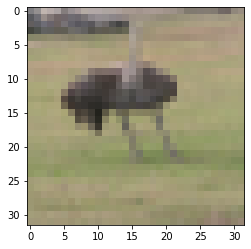

(32, 32, 3)

In [7]:
# Use the .imshow() function and show the plot
plt.imshow(x_train[42])
plt.show()
# Print the shape of the sample image
x_train[42].shape # RGB images have 3 channels 

In [8]:
# Create the validation datasets 
# and assign the last 10000 images of X_train and y_train
x_val = x_train[40000:]
y_val = y_train[40000:]
# Create new train datasets
# and assign the first 40000 images of X_train and y_train
x_train = x_train[:40000]
y_train = y_train[:40000]

In [9]:
print("X Train Length:", len(x_train))
print("X Test Length:", len(x_test))
print("X Val Length:", len(x_val))
print("Y Train Length:", len(y_train))
print("Y Test Length:", len(y_test))
print("Y Val Length:", len(y_val))

X Train Length: 40000
X Test Length: 0
X Val Length: 10000
Y Train Length: 40000
Y Test Length: 300000
Y Val Length: 10000


In [10]:
# Divide each dataset by 255
x_train = x_train / 255
x_val = x_val / 255

In [11]:
# Create a model object
model = tf.keras.Sequential()

2022-09-26 12:39:15.249848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 12:39:15.348643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 12:39:15.349533: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 12:39:15.351338: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add( tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add( tf.keras.layers.Dropout(0.30))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add( tf.keras.layers.Dropout(0.35))

In [13]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1028, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.5))

In [14]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [15]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.fit_transform(y_val)

In [17]:
y_train[0]

6

In [18]:
x_train = np.asarray(x_train).astype(np.float32)
x_val = np.asarray(x_val).astype(np.float32)

In [19]:
results = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_val, y_val))

2022-09-26 12:39:20.905986: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-09-26 12:39:23.210703: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1250/1250 [==============================] - 23s 12ms/step - loss: 1.9230 - accuracy: 0.3806 - val_loss: 1.5864 - val_accuracy: 0.4824
Epoch 2/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1706 - accuracy: 0.5913 - val_loss: 0.9669 - val_accuracy: 0.6694
Epoch 3/50
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9461 - accuracy: 0.6772 - val_loss: 0.8826 - val_accuracy: 0.7048
Epoch 4/50
1250/1250 [==============================] - 14s 11ms/step - loss: 0.8109 - accuracy: 0.7241 - val_loss: 1.0006 - val_accuracy: 0.6763
Epoch 5/50
1250/1250 [==============================] - 14s 11ms/step - loss: 0.7251 - accuracy: 0.7570 - val_loss: 0.9842 - val_accuracy: 0.7307
Epoch 6/50
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6305 - accuracy: 0.7889 - val_loss: 1.3693 - val_accuracy: 0.6732
Epoch 7/50
1250/1250 [==============================] - 14s 11ms/step - loss: 0.5616 - accuracy: 0.8120 - val_loss: 0.6880 - val_accura

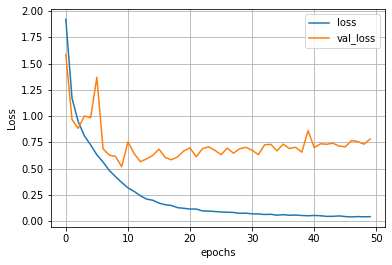

In [20]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("epochs")
plt.ylabel("Loss")
# Put legend table
plt.legend()
plt.grid()
# Show the plot
plt.show()

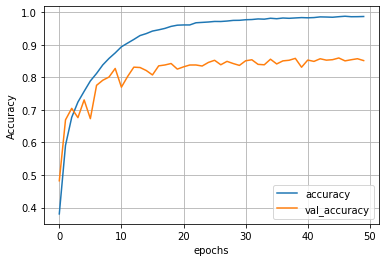

In [21]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("epochs")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()
plt.grid()
# Show the plot
plt.show()

In [22]:
import shutil
from py7zr import unpack_7zarchive
shutil.register_unpack_format('7zip',['.7z'],unpack_7zarchive)
shutil.unpack_archive('/kaggle/input/cifar-10/test.7z','/kaggle/temp/test')
shutil.unregister_unpack_format('7zip')
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(directory='/kaggle/temp/test',target_size=(32,32),batch_size=64,class_mode=None,shuffle=False)

Found 300000 images belonging to 1 classes.


In [23]:
test_gen.reset()
predictions_vecs = model.predict(test_gen)

predictions_final = np.argmax(predictions_vecs, axis=1)

In [24]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(cifar10_classes)
predicted_classes=np.empty(shape=300000,dtype=np.dtype('U20'))

ind=0
for i in predictions_final.tolist():
    predicted_classes[ind]=cifar10_classes[i]
    ind=ind+1
    
filenames_wo_ext = []
for fname in test_gen.filenames:
    filenames_wo_ext.append(int(fname.split(sep="/")[1].split(sep=".")[0])-1)

predicted_classes_final = np.empty(shape=300000,dtype=np.dtype('U20'))
predicted_classes_final[filenames_wo_ext]=predicted_classes

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [25]:
sub = pd.read_csv('../input/cifar-10/sampleSubmission.csv',header='infer')
sub.info()

sub['label'] = predicted_classes_final
sub.to_csv('submission.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   label   300000 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.6+ MB
